### Context
This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016.

### Data Dictionary
The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:

* **ID** - Unique number for each athlete
* **Name** - Athlete's name
* **Sex** - M or F
* **Age** - Integer
* **Height** - In centimeters
* **Weight** - In kilograms
* **Team** - Team name
* **NOC** - National Olympic Committee 3-letter code
* **Games** - Year and season
* **Year** - Integer
* **Season** - Summer or Winter
* **City** - Host city
* **Sport** - Sport
* **Event** - Event
* **Medal** - Gold, Silver, Bronze, or NA

In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the csv file (dataset)
df = pd.read_csv('athlete_events.csv')

In [3]:
#displaying first 5 rows
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
#checking datatype and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## 1. Perfoming a Hypothesis test

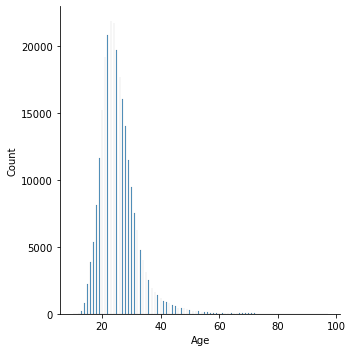

In [5]:
# plotting a density plot
sns.displot(df, x='Age') # we see that the major number of observations cluster between 20-30

In [6]:
df.Age.describe()

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

In [7]:
df1 = df # creating a new variable
df1 = df1[df1['Sex']=='M'] # filtering by men
df1 = df1[df1['Sport']=='Swimming'] # filtering by sport (swimming)

In [8]:
df1 = df1.dropna(subset=['Medal'], axis=0) # keeping medals only
df1 = df1[df1['Medal']=='Gold'] # filtering by gold medals 
df1 = df1[df1['Year']>1980] # filtering by games year (1980 and higher)
df1

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1843,1017,Nathan Ghar-Jun Adrian,M,19.0,198.0,100.0,United States,USA,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Gold
1844,1017,Nathan Ghar-Jun Adrian,M,23.0,198.0,100.0,United States,USA,2012 Summer,2012,Summer,London,Swimming,Swimming Men's 100 metres Freestyle,Gold
1846,1017,Nathan Ghar-Jun Adrian,M,23.0,198.0,100.0,United States,USA,2012 Summer,2012,Summer,London,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Gold
1849,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Gold
1850,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257907,129164,Garrett Weber-Gale,M,23.0,188.0,82.0,United States,USA,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Gold
257908,129164,Garrett Weber-Gale,M,23.0,188.0,82.0,United States,USA,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Gold
258086,129236,Ferry Weertman,M,24.0,189.0,86.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 10 kilometres Open Water,Gold
260596,130417,"Benjamin Marshall ""Ben"" Wildman-Tobriner",M,23.0,193.0,91.0,United States,USA,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Gold


In [9]:
df1=df1.sample(n=20, random_state = 1) # define random_state=1 in order to get the same result every time we run code
df1=df1.set_index('ID')

In [10]:
# the sample we will work with
df1[['Name','Sex','Age','Medal']]

,Name,Sex,Age,Medal
ID,,,,
85056,Ryk Neethling,M,26.0,Gold
53311,"Thomas Michael ""Tom"" Jager",M,19.0,Gold
82961,Yury Valeryevich Mukhin,M,20.0,Gold
94406,"Michael Fred Phelps, II",M,19.0,Gold
45621,"Thomas G. ""Tommy"" Hannan",M,20.0,Gold
53311,"Thomas Michael ""Tom"" Jager",M,27.0,Gold
78491,Oussama Mellouli,M,24.0,Gold
35856,"Jeffrey James ""Jeff"" Float",M,24.0,Gold
119755,"Nicholas Brewer ""Nick"" Thoman",M,26.0,Gold


In [11]:
mean = df1.Age.mean() # calculating Age mean
mean

23.1

#### Manual computation

In [12]:
df1['Difference']=df1.Age-df1.Age.mean() # difference betweeen each variable and mean of the sample
df1['Squared']=df1['Difference']**2 # squared difference
df1[['Name','Sex','Age','Difference','Squared']]

,Name,Sex,Age,Difference,Squared
ID,,,,,
85056,Ryk Neethling,M,26.0,2.9,8.41
53311,"Thomas Michael ""Tom"" Jager",M,19.0,-4.1,16.81
82961,Yury Valeryevich Mukhin,M,20.0,-3.1,9.61
94406,"Michael Fred Phelps, II",M,19.0,-4.1,16.81
45621,"Thomas G. ""Tommy"" Hannan",M,20.0,-3.1,9.61
53311,"Thomas Michael ""Tom"" Jager",M,27.0,3.9,15.21
78491,Oussama Mellouli,M,24.0,0.9,0.81
35856,"Jeffrey James ""Jeff"" Float",M,24.0,0.9,0.81
119755,"Nicholas Brewer ""Nick"" Thoman",M,26.0,2.9,8.41


In [13]:
# mathematical formula - manual computation
std = math.sqrt(df1.Squared.sum()/(20-1)) # standard deviation
print(round(std, 3))

2.808


In [14]:
# python code to compare the result
std = df1.Age.std() # calculating Age standard deviation
round(std, 3)

2.808

In [15]:
t = (mean-21)/std/math.sqrt(20) # t-coefficient
print(round(t, 3))

0.167


## 2. Perfoming a correlation analysis between two variables

In [16]:
# selecting numerical variables only
num_var = df.select_dtypes(include=np.number)

In [17]:
num_var

,ID,Age,Height,Weight,Year
0,1,24.0,180.0,80.0,1992
1,2,23.0,170.0,60.0,2012
2,3,24.0,NaN,NaN,1920
3,4,34.0,NaN,NaN,1900
4,5,21.0,185.0,82.0,1988
...,...,...,...,...,...
271111,135569,29.0,179.0,89.0,1976
271112,135570,27.0,176.0,59.0,2014
271113,135570,27.0,176.0,59.0,2014
271114,135571,30.0,185.0,96.0,1998


In [18]:
df2 = num_var[['Height','Weight']] # picking two variables to calculate correlation coefficient
df2

,Height,Weight
0,180.0,80.0
1,170.0,60.0
2,NaN,NaN
3,NaN,NaN
4,185.0,82.0
...,...,...
271111,179.0,89.0
271112,176.0,59.0
271113,176.0,59.0
271114,185.0,96.0


In [19]:
df2 = df2.dropna(axis=0) # dropping missing values

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206853 entries, 0 to 271115
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Height  206853 non-null  float64
 1   Weight  206853 non-null  float64
dtypes: float64(2)
memory usage: 4.7 MB


In [21]:
correlation=df2.corr(method = 'spearman') # calcuating Spearman correlation coefficient for the population
correlation

,Height,Weight
Height,1.000000,0.827131
Weight,0.827131,1.000000


<AxesSubplot:>

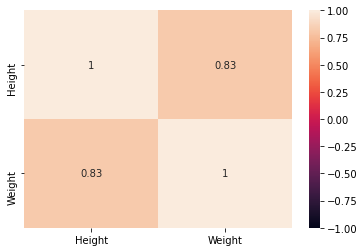

In [22]:
sns.heatmap(correlation,vmin=-1, vmax=1, annot=True) # plotting a heatmap for a visual representation

**Conclusion:** positive strong correlation

#### Creating a sample

In [23]:
# the sample we will work with
samp=df2.sample(n=10, random_state = 14)
samp

,Height,Weight
123553,158.0,48.0
13139,185.0,72.0
237107,183.0,71.0
96703,152.0,56.0
51026,179.0,68.0
270644,188.0,161.0
86739,165.0,54.0
163237,164.0,50.0
120279,180.0,75.0
49554,171.0,62.0


#### Python code

In [24]:
correlation=samp.corr(method = 'spearman') # calcuating Spearman correlation coefficient
correlation

,Height,Weight
Height,1.000000,0.890909
Weight,0.890909,1.000000


Correlation between variables **Height** and **Weight** equals 0.8909.

#### Manual computation

In [25]:
corr = pd.DataFrame({'Height_X': [9,2,3,10,5,1,7,8,4,6], # defining place in order (1 to 10)
                     'Weight_Y': [10,3,4,7,5,1,8,9,2,6], # defining place in order (1 to 10)
                     'Index':[123553, 13139,237107,96703,51026,270644,86739,163237,120279,49554] # keeping the index
                    })
corr = corr.set_index('Index')
concat=pd.concat([samp,corr],axis=1,join='inner') # placing both variables in order
concat

,Height,Weight,Height_X,Weight_Y
123553,158.0,48.0,9,10
13139,185.0,72.0,2,3
237107,183.0,71.0,3,4
96703,152.0,56.0,10,7
51026,179.0,68.0,5,5
270644,188.0,161.0,1,1
86739,165.0,54.0,7,8
163237,164.0,50.0,8,9
120279,180.0,75.0,4,2
49554,171.0,62.0,6,6


In [26]:
concat['Difference_di']=concat.Height_X-corr.Weight_Y # calculating the difference between Height_X and Weight_Y
concat['Squared_di^2']=concat['Difference_di']**2 # squaring the difference
concat

,Height,Weight,Height_X,Weight_Y,Difference_di,Squared_di^2
123553,158.0,48.0,9,10,-1,1
13139,185.0,72.0,2,3,-1,1
237107,183.0,71.0,3,4,-1,1
96703,152.0,56.0,10,7,3,9
51026,179.0,68.0,5,5,0,0
270644,188.0,161.0,1,1,0,0
86739,165.0,54.0,7,8,-1,1
163237,164.0,50.0,8,9,-1,1
120279,180.0,75.0,4,2,2,4
49554,171.0,62.0,6,6,0,0


In [27]:
squared = concat['Squared_di^2'].sum() # summing up the squared values
print(squared)

18


In [28]:
# spearman correlation formula
p = 1-((6*18)/(10*(10*10-1)))
print(round(p, 4))

0.8909


Correlation between variables **Height** and **Weight** equals 0.8909.

<AxesSubplot:xlabel='Height', ylabel='Weight'>

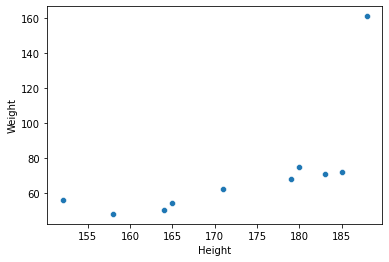

In [29]:
sns.scatterplot(data=concat, x='Height', y='Weight') #scatterplot displays strong positive correlation as well

## 3. Building a linear regression model

In [30]:
df3 = num_var[['Age','Height']] # picking two variables to calculate a linear regression
df3

,Age,Height
0,24.0,180.0
1,23.0,170.0
2,24.0,NaN
3,34.0,NaN
4,21.0,185.0
...,...,...
271111,29.0,179.0
271112,27.0,176.0
271113,27.0,176.0
271114,30.0,185.0


In [31]:
df3 = df3.dropna(axis=0) # removing missing values
df3

,Age,Height
0,24.0,180.0
1,23.0,170.0
4,21.0,185.0
5,21.0,185.0
6,25.0,185.0
...,...,...
271111,29.0,179.0
271112,27.0,176.0
271113,27.0,176.0
271114,30.0,185.0


<AxesSubplot:xlabel='Height', ylabel='Age'>

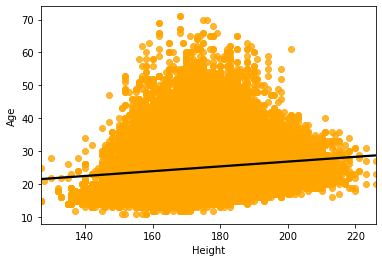

In [32]:
sns.regplot(data=df3, x='Height', y='Age', color='Orange', 
            line_kws={'color': 'Black'}) # plotting linear regression for the population

#### Manual computation

In [33]:
samp2 = df3.rename(columns={'Age':'Age_y','Height':'Height_X'}, inplace=True) # renaming columns as dependent and independent respectively
samp2=df3.sample(n=10, random_state = 7) # creating a sample
samp2

,Age_y,Height_X
13885,29.0,190.0
101797,24.0,171.0
147845,21.0,161.0
104939,39.0,183.0
54310,24.0,185.0
87111,28.0,204.0
182611,24.0,178.0
48373,28.0,185.0
159561,25.0,177.0
24072,39.0,186.0


In [34]:
corr2 = samp2.corr(method='pearson') # checking correlation 
corr2

,Age_y,Height_X
Age_y,1.000000,0.424395
Height_X,0.424395,1.000000


In [35]:
# calculating centroid
mean_age = samp2.Age_y.mean()
mean_height = samp2.Height_X.mean()
print(mean_age, mean_height)

28.1 182.0


In [36]:
samp2['Height_difference']=samp2.Height_X-mean_height # difference between each X variables and the X mean
samp2['Age_difference']=samp2.Age_y-mean_age # difference between each y variables and the y mean
samp2['Multiplied']=samp2['Age_difference']*samp2['Height_difference'] # multiplied two previous columns
samp2['Squared']=samp2['Height_difference']**2 # squared dependent varaibles
samp2

,Age_y,Height_X,Height_difference,Age_difference,Multiplied,Squared
13885,29.0,190.0,8.0,0.9,7.2,64.0
101797,24.0,171.0,-11.0,-4.1,45.1,121.0
147845,21.0,161.0,-21.0,-7.1,149.1,441.0
104939,39.0,183.0,1.0,10.9,10.9,1.0
54310,24.0,185.0,3.0,-4.1,-12.3,9.0
87111,28.0,204.0,22.0,-0.1,-2.2,484.0
182611,24.0,178.0,-4.0,-4.1,16.4,16.0
48373,28.0,185.0,3.0,-0.1,-0.3,9.0
159561,25.0,177.0,-5.0,-3.1,15.5,25.0
24072,39.0,186.0,4.0,10.9,43.6,16.0


In [37]:
# calculating slope
b = samp2.Multiplied.sum()/samp2.Squared.sum()
round(b, 2)

0.23

In [38]:
# calculating intercept
a = mean_age-b*mean_height
round(a, 2)

-13.79

a = 0.23 ,
b = -13.79
* **Age**: y
* **Height**: X

Lineal Regression Model: y = -13.79 + 0.23X

### Regression line model with Numpy

In [39]:
fit = np.polyfit(samp2.Height_X,samp2.Age_y, 1) # using polyfit to compute the slope and the intercept
fit

array([  0.2301855 , -13.79376054])

### Plot the scatteplot and the line model

Text(0, 0.5, 'Height')

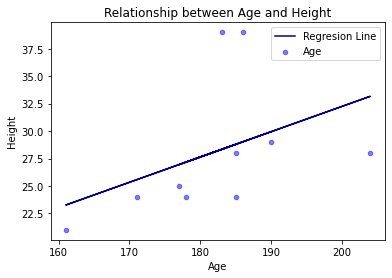

In [40]:
# scatter plots and regression lines

# scatter plots
ax1 = samp2.plot(kind='scatter', x='Height_X', y='Age_y', color='blue', alpha=0.5)

# regression lines
plt.plot(samp2.Height_X, fit[0] * samp2.Height_X + fit[1], color='darkblue')

# legend, title and labels.
plt.legend(labels=['Regresion Line', 'Age', 'Height'])
plt.title('Relationship between Age and Height')
plt.xlabel('Age')
plt.ylabel('Height')

<AxesSubplot:xlabel='Height_X', ylabel='Age_y'>

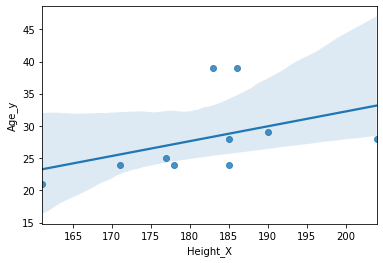

In [41]:
sns.regplot(data=samp2, x='Height_X', y='Age_y') # another way to plot the linear regression line - regplot of the seaborn library

### Prediction With Best Fit Line

In [42]:
new_x_value = 177 # pick a random dependent value to predict independent
y_predicted = (b * new_x_value) + a # linear regression formula
y_predicted 

26.94907251264756